In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats as st
import seaborn as ns
import matplotlib.pyplot as plt
import teradata 
udaExec = teradata.UdaExec ()

entain=r'C:/Users/apelle/.matplotlib/entain.mplstyle'
plt.style.use(entain)


In [2]:
#casino club are about 165 players and can't be unhosted,
#to identify casino club players search for condition: host_agent_team='VIP CasinoClub'

In [3]:
df=pd.read_csv('List2.csv')

In [4]:
df.head()

,Player_Id,bet_amt,cpd,ggr
0,"576,360,735",10500,4,1599
1,"204,442,185",16249,15,1532
2,"566,173,069",4377,10,960
3,"193,821,339",28409,15,2190
4,"517,800,410",186,2,27


In [5]:
df.fillna(0,inplace=True)

In [6]:
len(df)

3587

create theo NGR

In [7]:
df['t_ggr']=(df['bet_amt']*0.32)

In [8]:
df.describe()

,bet_amt,cpd,ggr,t_ggr
count,3587.000000,3587.000000,3587.000000,3587.000000
mean,23794.059381,10.785615,932.626986,7614.099002
std,54633.315244,8.449386,3915.662067,17482.660878
min,0.000000,0.000000,-106757.000000,0.000000
25%,685.500000,3.000000,41.000000,219.360000
50%,7424.000000,9.000000,392.000000,2375.680000
75%,25127.000000,17.000000,1525.000000,8040.640000
max,971725.000000,51.000000,35433.000000,310952.000000


Check variance for both Bet amt and Theo NGR

In [9]:
df.max()

Player_Id     945,317
bet_amt        971725
cpd                51
ggr             35433
t_ggr        310952.0
dtype: object

Variance coeffiecents for bet amt:230%


KeyboardInterrupt: 

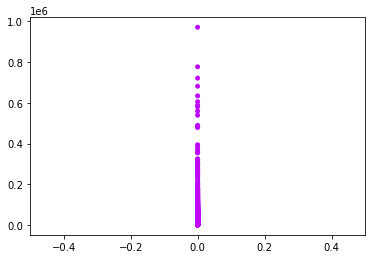

In [10]:

Y1=df['bet_amt'].std()/df['bet_amt'].mean()
print('Variance coeffiecents for bet amt:' +str( round(Y1*100) )+'%')
ns.swarmplot(y=df.bet_amt).set_title('Bet variance' )
#ns.swarmplot(y=Y2).set_title('Bet variance coefficent for CLV players= '+str(round(Y2.std()/Y2.mean() *100))+'%')


Altough this isn't going to be what we would normally do in reality we'll remove the outliers using a 3 zscore rule from the managed group and match the number of CLV only players to the final number of Managed players

In [11]:
from scipy import stats
A=df[['bet_amt']]
A=A[(np.abs(stats.zscore(A)) < 3).all(axis=1)]
len(A)

               

3532

Removing outliers

Below we have 2 functions:
    
    1) s_size--> finds the optimal sample size for a given lift %,requires 2 arguments: df and increase
    2) s_inc--> for a maxed sample size of len(x)/2 determines MDE for P=0.1 requires 1 argument: data

Largest divisor of 169 is 13


would you like to proceed with this sample size increase? Y/N
y


C:\Users\apelle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:69: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/12 [00:00<?, ?it/s]

C:\Users\apelle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:70: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\apelle\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

,sample size,mean control,std_control,std_test,mean test,mean delta,delta LB,delta UB,P(T>C)
0,13,6137.53,18747.01,6570.30,8111.54,1974.01,-10241.37,15991.36,0.64
1,26,6151.70,3820.70,21370.48,8021.07,1869.37,-6477.54,11124.68,0.67
2,39,6162.27,7509.10,12007.84,8047.97,1885.70,-4916.80,9330.34,0.71
3,52,6145.58,4657.92,12458.06,8071.19,1925.62,-3958.54,8422.90,0.74
4,65,6150.67,6770.19,12818.63,8013.82,1863.15,-3469.90,7471.68,0.76
5,78,6161.01,7865.01,12369.94,8035.62,1874.61,-2904.82,7052.00,0.77
6,91,6193.04,7638.36,20838.28,8043.77,1850.73,-2724.63,6746.25,0.79
7,104,6188.43,5407.28,19731.15,8025.91,1837.48,-2370.79,6243.88,0.80
8,117,6190.82,4599.47,17191.49,8041.20,1850.38,-2102.69,6050.25,0.81
9,130,6178.10,9188.79,14009.59,8070.11,1892.00,-1846.49,5820.99,0.83


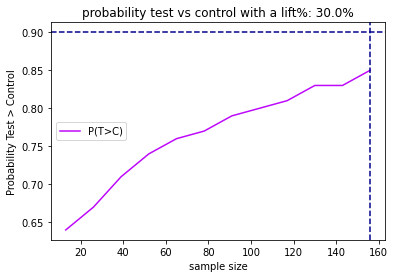

In [358]:
s_size(A,0.3)

In [12]:
import size_calc as sc

your sample size has been reduced to:3532 in order to ensure a 50% split


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

,increase,mean control,std_control,std_test,mean test,mean delta,delta LB,delta UB,P(T>C)
0,5,18621.69,29140.39,29606.53,19544.16,922.47,-1799.79,3682.82,0.74
1,10,18619.96,29850.52,31614.84,20487.32,1867.35,-967.85,4687.76,0.90
2,15,18637.03,29549.29,32556.24,21396.58,2759.55,-197.90,5716.95,0.97
3,20,18624.06,28790.82,35663.95,22363.65,3739.59,775.54,6823.06,0.99
4,25,18619.98,28964.68,38988.67,23271.67,4651.69,1648.06,7732.94,1.00
5,30,18627.04,31008.46,37524.49,24202.97,5575.94,2416.83,8660.57,1.00
6,35,18611.81,28142.51,37054.28,25150.25,6538.44,3366.99,9861.31,1.00
7,40,18607.98,30288.79,37151.36,26086.55,7478.57,4259.02,10708.75,1.00
8,45,18623.76,26730.20,43008.70,26990.83,8367.08,5151.07,11718.20,1.00
9,50,18630.12,30126.72,41382.80,27928.87,9298.75,5892.77,12813.15,1.00


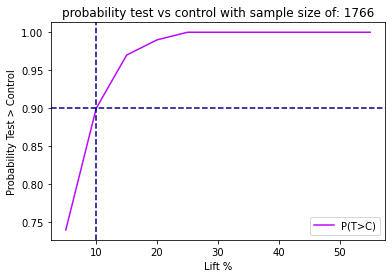

In [13]:
sc.s_inc(A)

Largest divisor of 169 is 13


would you like to proceed with this sample size increase? Y/N
Y


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

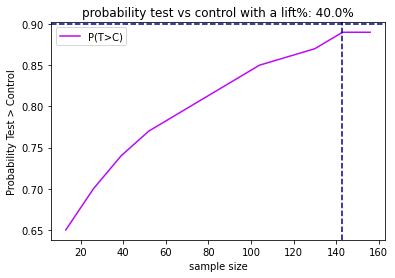

In [24]:
test=sc.s_size(A,0.4)

In [43]:
max_even(A)

338


338